In [31]:
import numpy as np
import keras
from keras import layers
from tensorflow.keras.utils import to_categorical

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [34]:
df = pd.read_csv("C:/Users/yosim/Desktop/2024-2/AI_2024-2/09-24/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [35]:
df = df.drop(['people'], axis=1)
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,4.033226e-02,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,2.212497e-02,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,9.656444e-02,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,2.448990e-02,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall


In [36]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [37]:
col_name = list(df.columns)
col_name

['T_xacc_mean',
 'T_xacc_max',
 'T_xacc_min',
 'T_xacc_var',
 'T_xacc_std',
 'T_xacc_skew',
 'T_yacc_mean',
 'T_yacc_max',
 'T_yacc_min',
 'T_yacc_var',
 'T_yacc_std',
 'T_yacc_skew',
 'T_zacc_mean',
 'T_zacc_max',
 'T_zacc_min',
 'T_zacc_var',
 'T_zacc_std',
 'T_zacc_skew',
 'T_xgyro_mean',
 'T_xgyro_max',
 'T_xgyro_min',
 'T_xgyro_var',
 'T_xgyro_std',
 'T_xgyro_skew',
 'T_ygyro_mean',
 'T_ygyro_max',
 'T_ygyro_min',
 'T_ygyro_var',
 'T_ygyro_std',
 'T_ygyro_skew',
 'T_zgyro_mean',
 'T_zgyro_max',
 'T_zgyro_min',
 'T_zgyro_var',
 'T_zgyro_std',
 'T_zgyro_skew',
 'T_xmag_mean',
 'T_xmag_max',
 'T_xmag_min',
 'T_xmag_var',
 'T_xmag_std',
 'T_xmag_skew',
 'T_ymag_mean',
 'T_ymag_max',
 'T_ymag_min',
 'T_ymag_var',
 'T_ymag_std',
 'T_ymag_skew',
 'T_zmag_mean',
 'T_zmag_max',
 'T_zmag_min',
 'T_zmag_var',
 'T_zmag_std',
 'T_zmag_skew',
 'RA_xacc_mean',
 'RA_xacc_max',
 'RA_xacc_min',
 'RA_xacc_var',
 'RA_xacc_std',
 'RA_xacc_skew',
 'RA_yacc_mean',
 'RA_yacc_max',
 'RA_yacc_min',
 'RA_ya

In [38]:
df_label = df

In [39]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df_label['activity'] = label.fit_transform(df['activity'])
df_label.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,12
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,12
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,12
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,12
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,12


In [40]:
df_label['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [41]:
X = df_label.drop(['activity'],axis=1)
X.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.29968,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.29974,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.30068,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.30088,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.30041,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429


In [42]:
y = df_label['activity']
y.value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.05586989, -0.54682785,  0.72552999, ..., -0.40055967,
        -0.91356288,  0.20430926],
       [ 0.05654454, -0.54549145,  0.75485833, ..., -0.40055834,
        -0.91332468,  0.70582832],
       [ 0.05458702, -0.55312923,  0.75482276, ..., -0.40056235,
        -0.91405634,  0.2185926 ],
       ...,
       [ 0.48787573,  1.12532257, -0.83226934, ...,  0.66390496,
         1.29572516,  1.22385012],
       [ 0.51272243,  4.91900932, -1.11628652, ...,  0.3120354 ,
         0.89173946, -2.24761744],
       [ 0.42973771,  2.56990422, -1.27998457, ...,  0.09107988,
         0.58379587, -0.21536545]])

In [62]:
scaled_X = pd.DataFrame(data = X, columns = col_name[:-1])
scaled_X['activity'] = y.values
scaled_X

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,0.055870,-0.546828,0.725530,-0.393761,-0.680020,-0.428085,0.860379,-0.148110,1.180617,-0.523874,...,-0.763476,-1.258551,0.441264,-0.350861,-0.623732,-0.017723,-0.400560,-0.913563,0.204309,12
1,0.056545,-0.545491,0.754858,-0.393913,-0.689658,0.321260,0.886595,-0.141000,1.195850,-0.524238,...,-0.763471,-1.257727,-0.439297,-0.351291,-0.623682,-0.018691,-0.400558,-0.913325,0.705828,12
2,0.054587,-0.553129,0.754823,-0.394011,-0.698774,-0.266880,0.886639,-0.141024,1.201248,-0.524308,...,-0.763478,-1.258909,-0.149907,-0.350716,-0.623032,-0.017234,-0.400562,-0.914056,0.218593,12
3,0.045943,-0.551243,0.726917,-0.393997,-0.697102,-0.699580,0.897675,-0.116077,1.201022,-0.523883,...,-0.763479,-1.259232,0.145985,-0.348852,-0.620142,-0.015135,-0.400553,-0.912443,0.533490,12
4,0.038098,-0.549365,0.752191,-0.394041,-0.702816,2.260389,0.907779,-0.130346,1.204990,-0.524269,...,-0.763474,-1.258165,-0.176094,-0.347060,-0.619151,-0.013759,-0.400559,-0.913492,0.562119,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,0.137071,1.655485,-1.157264,0.227365,0.828746,1.359448,-0.309098,2.255757,-1.995499,3.229043,...,0.929522,1.136731,0.027970,0.672634,1.495942,-0.179497,1.772137,2.248278,-0.355326,1
9116,0.485748,3.135591,-1.247811,0.396470,1.026158,3.482356,0.407591,1.243317,-2.023874,0.839244,...,0.165236,0.513064,-0.400314,0.462184,1.068894,-0.550704,1.362464,1.933362,-1.043491,1
9117,0.487876,1.125323,-0.832269,0.687019,1.321130,0.186968,0.037550,0.473614,-1.171390,0.929592,...,3.289975,2.452924,0.087173,-0.872056,-0.224429,-1.179881,0.663905,1.295725,1.223850,1
9118,0.512722,4.919009,-1.116287,0.919998,1.529826,5.447649,0.103704,1.034192,-1.293930,0.540677,...,0.264508,0.605839,0.201287,1.351600,1.410760,0.302501,0.312035,0.891739,-2.247617,1


In [63]:
import scipy.stats as stats

Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40
scaled_X.shape

(9120, 271)

In [68]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 269

    frames = []
    labels = []
    n=[0]*269
    for i in range(0, len(df) - frame_size, hop_size):
        for j in range(N_FEATURES):
            print(j)
            n[j] = df_label[col_name[j]].values[i: i + frame_size]
            '''
            x = df['x'].values[i: i + frame_size]
            y = df['y'].values[i: i + frame_size]
            z = df['z'].values[i: i + frame_size]
            '''
        # Retrieve the most often used label in this segment
        label = stats.mode(df['activity'][i: i + frame_size])[0][0]
        frames.append(n)
        labels.append(label)
        n=[0]*269
    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [69]:
X, y = get_frames(scaled_X, frame_size, hop_size)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268


IndexError: invalid index to scalar variable.

In [13]:
X.shape, y.shape

((9120, 270), (9120,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7296, 270), (1824, 270), (7296,), (1824,))

In [31]:
n_classes = len(set(y_train))
n_classes

19

In [32]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [33]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [34]:
import keras
from keras import layers

input_shape = X_train.shape
input_shape

(7296, 270)

In [35]:
model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

In [36]:
model.compile(
    loss="sparse_categorical_crossentropy",
    #loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    #metrics=["sparse_categorical_accuracy"],
    metrics=["accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 7296, 270)]          0         []                            
                                                                                                  
 multi_head_attention_5 (Mu  (None, 7296, 270)            1109262   ['input_3[0][0]',             
 ltiHeadAttention)                                                   'input_3[0][0]']             
                                                                                                  
 dropout_9 (Dropout)         (None, 7296, 270)            0         ['multi_head_attention_5[0][0]
                                                                    ']                            
                                                                                            

 conv1d_13 (Conv1D)          (None, 7296, 270)            1350      ['dropout_14[0][0]']          
                                                                                                  
 layer_normalization_13 (La  (None, 7296, 270)            540       ['conv1d_13[0][0]']           
 yerNormalization)                                                                                
                                                                                                  
 tf.__operators__.add_13 (T  (None, 7296, 270)            0         ['layer_normalization_13[0][0]
 FOpLambda)                                                         ',                            
                                                                     'tf.__operators__.add_12[0][0
                                                                    ]']                           
                                                                                                  
 multi_hea

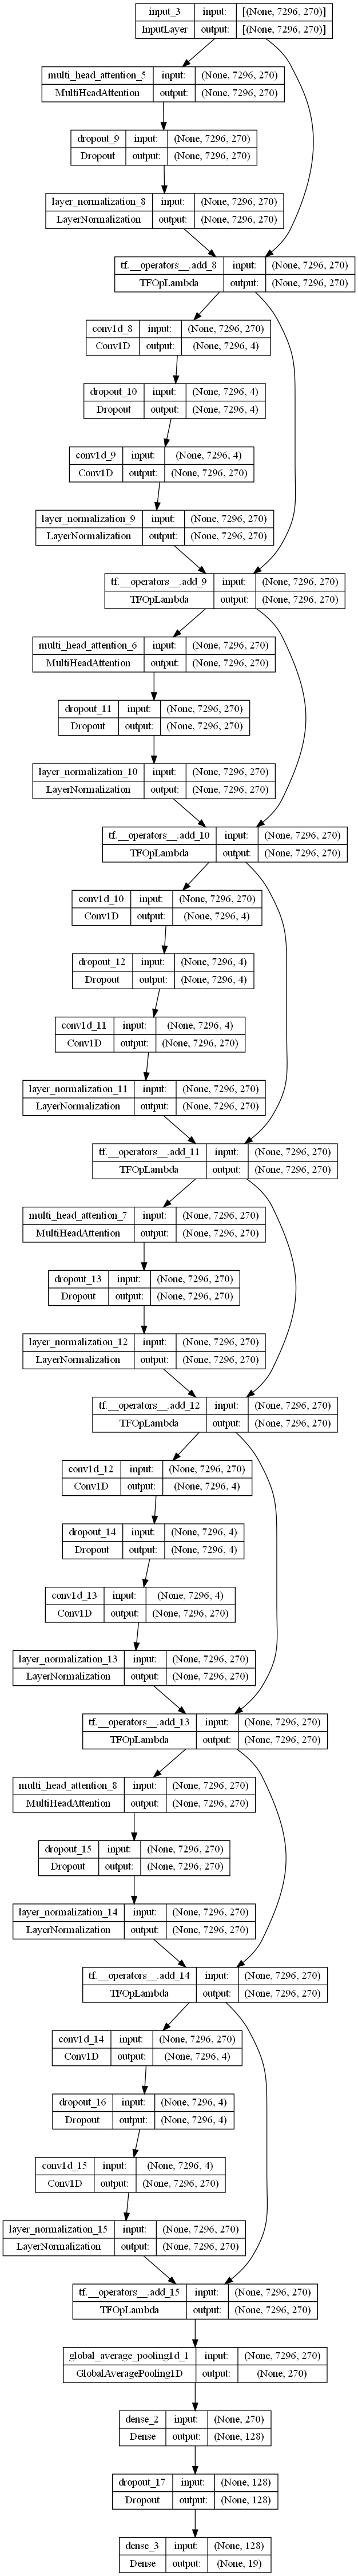

In [37]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [38]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(X_test, y_test, verbose=1)

Epoch 1/300


ValueError: in user code:

    File "C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\yosim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 7296, 270), found shape=(None, 270)
